# Can meaningful political extrapolations be made from President Donald Trump's twitter feed?

### Solo project by Dylan Redfield

# Introduction
Communication between the President of the United States and his constituents is an ever evolving phenomenon of US politics. The vast majority of American history saw a significant buffer zone between the daily operations of the president and the press. As communication technology like the [radio](https://en.wikipedia.org/wiki/Fireside_chats) and [television](https://www.youtube.com/watch?v=QazmVHAO0os) became a staple of American homes, the role of the [press secretary](https://en.wikipedia.org/wiki/White_House_Press_Secretary) became increasingly important. For better or worse the American public would have controlled access to the president, curated into only their most refined moments.

But Donald Trump’s usage of [twitter](https://twitter.com/realDonaldTrump) has flipped the status quo on its heels by offering a constant stream of primary source access to the President. For better or for worse, Trump’s tweets are not controlled or curated, but rather a direct line to exactly what he is thinking at any given time. He hasn’t been known to hold back against political enemies, both foreign and domestic-- often times going on sprees of late night attacks, which some critics call erratic. 

But is Trump’s twitter usage really a meaningful connection to the people, or a harmful distraction with material consequences? We wish to seek our that answer through quantitative analysis. Does his twitter habits have an effect on his approval rating? And how legitimate are the fears of Trump’s late night twitter rampages? Could they have a positive effect of gaining support from his base? Can we predict that level of support based on the content of the tweets?

Let’s find out.

## Datasets
We’ll be utilizing two databases for our analysis

- The [Trump twitter archive](http://www.trumptwitterarchive.com/archive) provides up to date tweets from Donald Trump’s twitter in a nifty csv file
- The [538 Trump approval rating dataset](https://github.com/fivethirtyeight/data/tree/master/trump-approval-ratings) provides day by day approval rating stats for several different pollsters including gallup, rameuseun, etc

## Required tools
All of our data analysis will be done using python, primarily with the numpy stack. Tools like conda and pip can be used to easily install them. The library include

#### [Numpy](http://www.numpy.org/)
allows us to store and modify matrix data quickly and easily. Most of the other libraries used rely heavily on numpy's work.

#### [Pandas](https://pandas.pydata.org/)
allows us to store and manipulate tabular data with ease.

#### [Seaborn](https://seaborn.pydata.org/)
is a useful library for creating rich visualization using data from pandas.

#### [TextBlob](https://textblob.readthedocs.io/en/dev/)
is a natural language processing library with built in functions for sentiment analysis. We’ll go over this in more detail when we use it later down in the tutorial

#### [Scikit-learn](https://scikit-learn.org/stable/)
offers machine learning fucntionality.

# 2 Data Collection

You'll want to download and save our two specified databases containing Trump's tweets and approval ratings. Both datasets are provided as [Comma-separed Values (CSV)](https://en.wikipedia.org/wiki/Comma-separated_values) . As the name implies values in a CSV file are comma delimited and rows are delimited by new lines. But we don't need to worry about that as pandas offers a nifty method for reading a csv file into a dataframe that does a much better job then we could ever hope to.

A [dataframe](https://pandas.pydata.org/pandas-docs/stable/10min.html) is a representation of tabular data, much like an excel spreadsheet. The linked resources will get you up to date on some of the important methods dataframe offer. But at the very minimum you should know a dataframe is made up of series (rows) and index's (columns).

Below we load our data into two seperate dataframes and take a look at some of the data they give us using the head() function.

In [1]:
import pandas as pd

tweet_data = pd.read_csv("trump_twitter.csv")

tweet_data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,I am in the process of interviewing some reall...,12-10-2018 01:27:23,7678.0,35115,false,1.071939e+18
1,Twitter for iPhone,The Trump Administration has accomplished more...,12-09-2018 22:43:13,19759.0,80725,false,1.071898e+18
2,Twitter for iPhone,Leakin’ James Comey must have set a record for...,12-09-2018 13:53:30,25910.0,96863,false,1.071765e+18
3,Twitter for iPhone,On 245 occasions former FBI Director James Co...,12-09-2018 13:38:22,28734.0,100857,false,1.071761e+18
4,Twitter for iPhone,It was my honor to attend today’s #ArmyNavyGam...,12-08-2018 23:31:15,18860.0,91805,false,1.071548e+18


And we're going to do the same for the approval rating data. 538 provides us with polls from several diffent pollsters, but for consistency sake we're only going to worry about polls provided by Gallup.

We used the `loc` function on a dataframe to query for all rows who's pollster name is equal to 'Gallup'.

In [2]:
approval_data = pd.read_csv("approval_polllist.csv")

approval_data = approval_data.loc[approval_data['pollster'] == 'Gallup']

approval_data

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,...,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
1,Donald Trump,All polls,12/7/2018,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.245429,...,45.0,46.06874,43.17091,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,09:46:03 7 Dec 2018
3,Donald Trump,All polls,12/7/2018,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.226788,...,46.0,46.06874,44.17091,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,09:46:03 7 Dec 2018
7,Donald Trump,All polls,12/7/2018,1/22/2017,1/24/2017,Gallup,B,1500.0,a,0.212047,...,45.0,47.06874,43.17091,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49236,77248,1/25/2017,09:46:03 7 Dec 2018
10,Donald Trump,All polls,12/7/2018,1/23/2017,1/25/2017,Gallup,B,1500.0,a,0.200168,...,45.0,47.06874,43.17091,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49245,77257,1/26/2017,09:46:03 7 Dec 2018
14,Donald Trump,All polls,12/7/2018,1/24/2017,1/26/2017,Gallup,B,1500.0,a,0.190472,...,48.0,46.06874,46.17091,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49242,77254,1/27/2017,09:46:03 7 Dec 2018
16,Donald Trump,All polls,12/7/2018,1/25/2017,1/27/2017,Gallup,B,1500.0,a,0.182500,...,50.0,43.06874,48.17091,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49257,77269,1/28/2017,09:46:03 7 Dec 2018
20,Donald Trump,All polls,12/7/2018,1/26/2017,1/28/2017,Gallup,B,1500.0,a,0.175930,...,51.0,43.06874,49.17091,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49251,77263,1/29/2017,09:46:03 7 Dec 2018
22,Donald Trump,All polls,12/7/2018,1/27/2017,1/29/2017,Gallup,B,1500.0,a,0.170532,...,50.0,44.06874,48.17091,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49235,77247,1/30/2017,09:46:03 7 Dec 2018
27,Donald Trump,All polls,12/7/2018,1/28/2017,1/30/2017,Gallup,B,1500.0,a,0.166140,...,51.0,44.06874,49.17091,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49267,77279,1/31/2017,09:46:03 7 Dec 2018
30,Donald Trump,All polls,12/7/2018,1/29/2017,1/31/2017,Gallup,B,1500.0,a,0.162635,...,52.0,44.06874,50.17091,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49244,77256,2/1/2017,09:46:03 7 Dec 2018


## Tidy data

Now we have our data and while it's quite good, its not a bit rough on the edges, so we need to [tidy it up](https://en.wikipedia.org/wiki/Tidy_data).

First things first, let's remove all the columns of information that are not relevent to our analysis. In the case of the approval data, that's a lot of columns.

In [3]:
approval_data = approval_data.drop(
    ['president', 'subgroup', 'modeldate',
     'pollster', 'grade', 'samplesize', 'population', 'weight', 
     'startdate', 'multiversions', 'tracking', 'createddate', 'url', 
     'approve', 'disapprove', 'poll_id', 'timestamp', 'influence', 
     'question_id'], axis = 1)
tweet_data = tweet_data.drop(['source', 'retweet_count', 'is_retweet',
                              'id_str'], axis = 1)

approval_data.head()

,enddate,adjusted_approve,adjusted_disapprove
1,1/22/2017,46.06874,43.17091
3,1/23/2017,46.06874,44.17091
7,1/24/2017,47.06874,43.17091
10,1/25/2017,47.06874,43.17091
14,1/26/2017,46.06874,46.17091


Next you'll notice our dates aren't uniformly formated. We'll want those dates in a format that python and pandas can understand and make computations on. We'll do this using the built in `to_datetime()` pandas method.

The method takes in a series, in this case our rows, and a format in which we can specifiy the month, day, year, etc. Notice that in the second conversion we set the errors paramter to coerce. This is because their is some missing data. We want the operationt to still go through, so the 'coerce flag' set's invalid values to NaT, that we'll then throwaway with the `dropna()` method.



In [4]:
from datetime import datetime
import math

# Make datetimes
approval_data["enddate"] = pd.to_datetime(approval_data["enddate"], 
                                          format = "%m/%d/%Y")
tweet_data["created_at"] = pd.to_datetime(tweet_data["created_at"], 
                                          format = "%m-%d-%Y %H:%M:%S", 
                                          errors = 'coerce')

# drop missing dates
tweet_data = tweet_data.dropna(subset = ['created_at'])



The favorites data is interpreted by pandas as a string, but we want to convert it to an integer with the `to_numberic()` command.

The dataset also includes retweets, but retweets cannot be favorited, so they get values of zero which can seriously skew our data, so we are going to drop those columns

Since we removed rows from each, we'll also want to reindex.

In [5]:
tweet_data['favorite_count'] = pd.to_numeric(tweet_data['favorite_count'])
tweet_data = tweet_data.loc[tweet_data['favorite_count'] != 0]

tweet_data = tweet_data.reset_index(drop = True)
approval_data = approval_data.reset_index(drop = True)

We're pretty close to having some quality tidy data, but as a last finishing touch we'll rename the indexes to some more friendly and explanatory names.

In [6]:
tweet_data.columns = ['text', 'date', 'favorites']
approval_data.columns = ['date', 'approve', 'disapprove']

Now let's take a look at our final tidy and data sets.

In [7]:
approval_data.head()

,date,approve,disapprove
0,2017-01-22,46.06874,43.17091
1,2017-01-23,46.06874,44.17091
2,2017-01-24,47.06874,43.17091
3,2017-01-25,47.06874,43.17091
4,2017-01-26,46.06874,46.17091


In [8]:
tweet_data.head()

,text,date,favorites
0,I am in the process of interviewing some reall...,2018-12-10 01:27:23,35115
1,The Trump Administration has accomplished more...,2018-12-09 22:43:13,80725
2,Leakin’ James Comey must have set a record for...,2018-12-09 13:53:30,96863
3,On 245 occasions former FBI Director James Co...,2018-12-09 13:38:22,100857
4,It was my honor to attend today’s #ArmyNavyGam...,2018-12-08 23:31:15,91805


That's some damn fine lookin' data.

# Weekly Processing
For our fist hypothesis we want to analysis if there is a relationship between Trump's twitter usage and his approval rating. There will be a significant lag in approval rating from when a causal event happens, so we want to analyze based on weekly aggregates.

We'll start by adding a week column to both datasets that we'll then use to group our dataframes together. To do this we use the `apply()` function on our dataframe. This function applys a function to all other rows or columns and modifies it based on the result. In our case we want to modify each row, so we supply the parameter `axis = 1`, otherwise an entire column would be fed into pandas.

In the `add_week()` function, we are calcuating what week of the Trump presidency it is, meaning how many weeks has it been since the [inarguation day](https://en.wikipedia.org/wiki/United_States_presidential_inauguration).

In [9]:
inarguation = datetime(2017, 1, 20, 0, 0, 0)

def add_week(series):
    delta = series['date'] - inarguation
    week = math.floor(delta.days / 7)
    series['week'] = week
    return series

approval_data = approval_data.apply(add_week, axis = 1)

tweet_data = tweet_data.apply(add_week, axis = 1)
approval_data.head()

,date,approve,disapprove,week
0,2017-01-22,46.06874,43.17091,0
1,2017-01-23,46.06874,44.17091,0
2,2017-01-24,47.06874,43.17091,0
3,2017-01-25,47.06874,43.17091,0
4,2017-01-26,46.06874,46.17091,0


We want to make sure the data is as complete as possible, but they lag a bit in the first and last weeks, so we can drop those. Also the tweet dataset contains all of Trump's tweets, not just those as president, so we need to drop all values with negative weeks.

In [10]:
tweet_data = tweet_data[tweet_data.week != 98]
approval_data = approval_data[approval_data.week != 98]
tweet_data = tweet_data[tweet_data.week != 97]
approval_data = approval_data[approval_data.week != 97]

tweet_data = tweet_data[tweet_data.week >= 0]
approval_data = approval_data[approval_data.week >= 0]

Now we're ready to start aggreating our data based on weekly metrics. We'll create a seperate dataframe for this as to not messy our original data that we are going to use in other computations. 

The week number makes a good index value since it is independent to all observations.

Below we utilze a similar strategy of applying functions to rows, but with a slight twist. First we group the values together by their week. In this case our auxilary functions take in DataFrame, and return a series which we save into a column of our weekly dataframe.

Also notice that we add a week column. This might seem silly because the index represents the week, but it is useful for the visualization we do later.

So we take some weekly agregates like the number of tweets and the average approval and disapprove rating of the week.

In [11]:
weekly = pd.DataFrame(index = range(1, tweet_data['week'].max() + 1))

def add_week_col(df):
    return df.iloc[0]['week']

weekly['week'] = tweet_data.groupby('week').apply(add_week_col)

def sum_tweets(df):
    return len(df.index)

weekly['tweets'] = tweet_data.groupby('week').apply(sum_tweets)

def avg_approval(df):
    return df['approve'].mean()

weekly['approve'] = approval_data.groupby('week').apply(avg_approval)

def avg_disapproval(df):
    return df['disapprove'].mean()

weekly['disapprove'] = approval_data.groupby('week').apply(avg_disapproval)

weekly.head()

,week,tweets,approve,disapprove
1,1,41,43.359501,49.416682
2,2,52,43.216644,50.416682
3,3,46,40.502358,52.416682
4,4,23,42.359501,51.416682
5,5,24,42.788072,50.988111


Since our hypothesis is measuring how the number of tweets affects his approval rating, we'll want ot measure it based on change from week to week. To do this, we'll add a final column representing the net change from the last week. We do this with the `shift()` method that allows us to subtract the current week from the last week

In [12]:
weekly['approve_change'] = weekly['approve'] - weekly['approve'].shift()
weekly.head()

,week,tweets,approve,disapprove,approve_change
1,1,41,43.359501,49.416682,NaN
2,2,52,43.216644,50.416682,-0.142857
3,3,46,40.502358,52.416682,-2.714286
4,4,23,42.359501,51.416682,1.857143
5,5,24,42.788072,50.988111,0.428571


## Exploratory stats

We have our weekly data, so let's start exploring it! How many times does Trump per week on average?

In [13]:
weekly['tweets'].mean()

50.03125

What about the median?

In [14]:
weekly['tweets'].median()

48.0

As you can see the median and mean are relatively close, so the data shouldn't be skewed in one direction or the other if we graphed them.

Average approval rating?

In [15]:
weekly['approve'].mean()

40.035505178571434

What about disapproval?

In [16]:
weekly['disapprove'].mean()

53.658720833333341

## Visualization

Now that we have our weekly data agregates we can start visualizing our data and see some meaningful relationships and interesting tidbits. Visualization is important because it allows us to quickly see generalizations. We can see if relationships exists or not and if we should continue exploring in more detail or move on to a different hypothesis.

Let's start off by visualizing Trump's tweeting habits. Is he more or less active as his term goes on?

Seaborn makes visualizations super easy. We can supply a x column index and a y column index along with the dataframe we want to use, and it'll visualize it with ease.

Here we'll make a simple scatter plot with the `relplot()` command.

In [17]:
import seaborn as sns
sns.relplot(x = 'week', y = 'tweets', data = weekly)

There seems to be a significant positive correlation. We can add a regression line to our graph by slightly modifying the seaborn command to `lmplot()`.

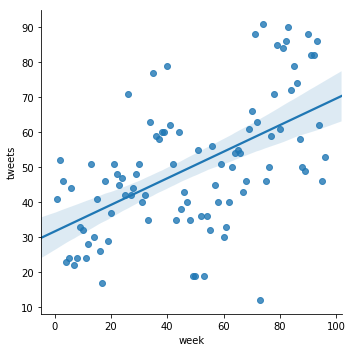

In [18]:
sns.lmplot(x = 'week', y = 'tweets', data = weekly)

Let's also graph his weekly average approval rating

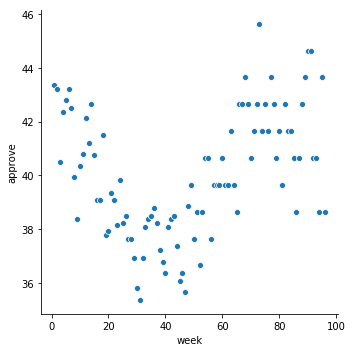

In [19]:
sns.relplot(x = 'week', y = 'approve', data = weekly)

As you can see, his approval rating dips about half a year into his term, then starts to recover to his original ratings.

# First Hypothesis
After those initial visualizations, we get into what we really want to see. Is there a relationship between Trump's change in approval rating to his tweet frequency?

This can be formalized in a [hypothesis](http://mathworld.wolfram.com/HypothesisTesting.html). We want to create two hypothesis a "null" and "alternate" hypothesis. The null hypothesis represents the status quo "Trump's approval rating does not affect his tweet frequency". And the alternate hypothesis is a contradictory statement "A decrease in Trump's net approval rating causes him to tweet more frequently in a week".

Only if we find such a relation can we confidently reject the null hypothesis.

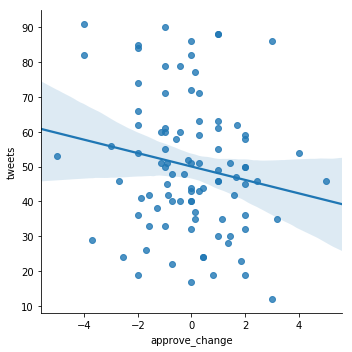

In [20]:
sns.lmplot(x = 'approve_change', y = 'tweets', data = weekly)

Upon first glance there seems to be a very slight negative trend, supporting our hypothesis. But is the trend large enough to reject the null hypothesis?

Certainly it is worth exploring more. To paint a more accurate picture we will [standardize](https://en.wikipedia.org/wiki/Standard_score) our tweet variable. This means we will express the number our tweets not just as raw frequency, but as the number of [standard deviations](https://en.wikipedia.org/wiki/Standard_deviation) away it is from the average number of tweets.

To do that we want to subtract the value from the average and devide it by the standard deviation.

Then we graph it again.

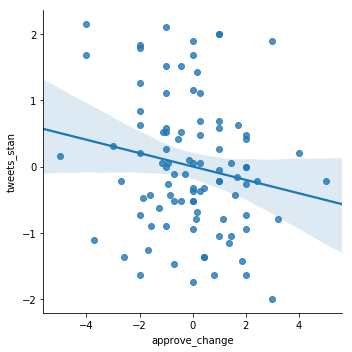

In [21]:
avg = weekly['tweets'].mean()
stan_dev = weekly['tweets'].std()
weekly['tweets_stan'] = (weekly['tweets'] - avg) / stan_dev
sns.lmplot(x = 'approve_change', y = 'tweets_stan', data = weekly)

While there is a trend line, the values have a huge ammount of variation. Values at most values of x are within + and - 2 standard devations away. While it may be a slightly interesting generalization, it is not enough to prove a causaul relataionship and predict future tweet frequency, therefore we cannot confidently reject out null hypothisis.

But, alas, we are not done yet! Maybe weekly statistics are too long to generate a meaningful behavioral reaction. Instead let's focus on daily data.

This process looks a lot like what we did before with our weekly agregates, but this time, instead of weeks since the inarguation, it's days since.

In [22]:
daily = pd.DataFrame(index = range(1, 
                (approval_data['date'].max() - inarguation).days + 1))

The provided dataset contains several posts finished on the same day, so we will take the average of those two polls and save the result in our dataset.

In [23]:
# So we want to take the average of those
def check(df):
    if len(df.index) > 1:
        print("More than one")

# Check if there is more than one poll per day
def combine(df):
    return df.mean()

def add_day(series):
    series['day'] = (series['date'] - inarguation).days
    return series

approval_data = approval_data.apply(add_day, axis = 1)
tweet_data = tweet_data.apply(add_day, axis = 1)

combined = approval_data.groupby('day').apply(combine)

daily = daily.join(combined, how = 'outer')
daily.head()

,approve,disapprove,week,day
1,NaN,NaN,NaN,NaN
2,45.645215,43.273825,0.0,2.0
3,45.645215,44.273825,0.0,3.0
4,46.645215,43.273825,0.0,4.0
5,46.645215,43.273825,0.0,5.0


There will still be lag over Trump's approval rating to his behavior, but that's okay. From the approval rating we want to campture the overal attitude of the country, and a potential cloud hanging over Trump's attitude. So to do this we can check the net change in approval rating over the last three days, so we again use the `shift()` method-- this time with a value of 3.

In [24]:
daily['three_day'] = daily['approve'] - daily['approve'].shift(3)

def sum_tweets(df):
    return len(df.index)

daily_tweets = tweet_data.groupby('day').apply(sum_tweets)

daily['tweets'] = daily_tweets
daily.head()


,approve,disapprove,week,day,three_day,tweets
1,NaN,NaN,NaN,NaN,NaN,2.0
2,45.645215,43.273825,0.0,2.0,NaN,4.0
3,45.645215,44.273825,0.0,3.0,NaN,1.0
4,46.645215,43.273825,0.0,4.0,NaN,4.0
5,46.645215,43.273825,0.0,5.0,1.0,8.0


Now we have our daily agregates and three day net approval change and we can graph the relationship and hope to find something worth exploring.

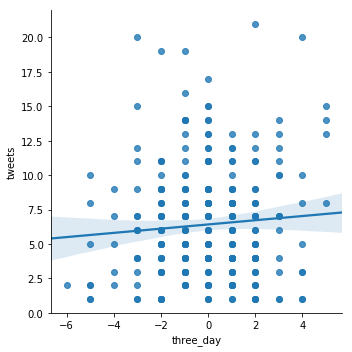

In [25]:
sns.lmplot(x = 'three_day', y = 'tweets', data = daily)

Unforuntely, still nothing. But that's okay! Because the relationship didn't exist, but we were careful and scientific about our findings. The results didn't align with our hypothesis, but that is an important result in itself.

So I think it is safe to say we cannot reject our null hypothesis, and Trump's twitter behavior is not affected by his approval rating.

# Hypothesis Two

Let's move on to a second hypothesis this time focusing on Trump late night twitter habits. When things aren't going Trump's way does it trigger some late night twitter rants?

Again, let's set up a formal null and alternate hypothesis representing the status quo and otherwise. "Donald Trump's approval rating does not affect the frequency he tweets between the hours of midnight and 4am." is the null hypothesis and the alternate hypothesis is "There is a negative realtionship between Donald Trump's approval rating and the ammount he tweets between midnight and 4am".

Let's start off by applying a filter to our tweet data to sum the ammount of tweets after midnight on any given day. When we apply this function to a our tweet data grouped by day it will return a dataframe indexed by the day containing the sum of post-midnight tweets. We then combine this dataframe to our original daily agregate dataframe. But since there is a significant ammount of missing rows, but we want to keep those rows, we will use the dataframe's join function. By specifying the join as 'outer' we are not losing any data, whereas if we chose 'inner' we would be losing the most data as that can be thought of as a mutally exclusive opeprate. You can learn more about the different kinds of joins and how they relate to set theory here [LINK](https://www.w3schools.com/sql/sql_join.asp).

In [26]:
def after_midnight(df):
    df = df.set_index('date')
    midnight = df.between_time('00:00', '4:00')
    return pd.Series({'midnight_tweets': len(midnight.index)})

midnight = tweet_data.groupby('day').apply(after_midnight)
daily = daily.join(midnight, how = 'outer')

daily


,approve,disapprove,week,day,three_day,tweets,midnight_tweets
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,2.0,0.0
2,45.645215,43.273825,0.0,2.0,NaN,4.0,0.0
3,45.645215,44.273825,0.0,3.0,NaN,1.0,0.0
4,46.645215,43.273825,0.0,4.0,NaN,4.0,0.0
5,46.645215,43.273825,0.0,5.0,1.0,8.0,4.0
6,45.645215,46.273825,0.0,6.0,0.0,11.0,4.0
7,42.645215,48.273825,1.0,7.0,-4.0,7.0,0.0
8,42.645215,49.273825,1.0,8.0,-4.0,5.0,0.0
9,43.645215,48.273825,1.0,9.0,-2.0,7.0,0.0


Now we have our data let's visualize it and see if it we can interpret a relationship rejecting our null hypothesis.

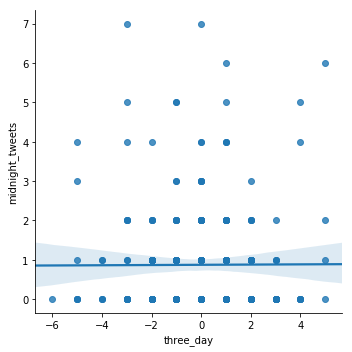

In [27]:
sns.lmplot(x = 'three_day', y = 'midnight_tweets', data = daily)

As you can see in the graph, there is relatively no relationship. Infact, there is the slightest of positive relationships, although not significant, but our alternate hypothesis predicted a negative relationship. Therefore we are unable to reject our null hypothesis.

Thus far we have been unable to reject three null hypothesis. Does this imply a failure on our part? Absolutely not, because each hypothesis test still provides important information about Trump's behavior. After three seperate hypothesis test it is fair to say that Trump's tweeting habits are not tied to his approval rating.

And that provides an important insight into the social science of the presidency. It may provide a legitimate rebuke to the critiscms that Trump's twitter is an emotional, reactionary, regrettful medium. And provide an argument in favor of the idea that having a direct connection to the presidents mind its a benefit without the intutive negative effects. Do these hyptohesis tests provide a full argument? No, but do they help provide details into a fully fleshed out argument? Absolutely.

# But we're not done yet- Sentiment analysis

Can Trump's twitter, and the speicific contents of his tweets be used as a tool? Approval rating is not the only metric to measure consitutents. What about Trump's base itself, the people who already support him? There is political merrit in keeping that base motivated and excited. It helps provide political capital for policy agenda, but also helps turn out the vote in different elections like local and midterm elections. A fired up, passionate base is more likely to get out of bed to vote. 

So it begs the question, are Trumps tweets helping motivate his base. Specifically, are the afforementioned negative tweets helping motivate his base. The tweets that seem unessarilly rude, or emotional, or flat out immature. Tweet's that use "colorful" language and poke out Trump's favorite boogeymen like Hilary Clinton and the "Fake news" media. Are tweets about these scapegoats popular among his base? To measure this we'll analyze the number of favorites his tweets get. While a clearly imperfect metric, the ammount of favorite one tweets gets relative to another can provide a powerful metric of comparison of exactly what tweets affect his base in what ways.

Let's answer that question through two hypothesis measuring how his base reacts to more negative or positive tweets, and if the frequency of specifc keywords influences the base's reaction.

We will be using a useful library called textblob for [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis). TextBlob allows us to input a message, wether it be a phrase, sentence, or several sentences-- and will return back to us a score between -1 and 1. A score of -1 is the most negative while a score a +1 is the most positive.

[Pip](https://pypi.org/project/pip/) python package manager makes it easy to install packages. If you're following along in a jupyter notice add a `!` before your command to run it as a shell command. Along with textblob we'll also need to download a corpus to be able to take advantage of the sentiment analysis features. A corpus is a large dataset containing prelabeled natural langauge. TextBlob uses these examples to conduct it's analysis.

In [28]:
!pip install -U textblob
!python -m textblob.download_corpora

Requirement already up-to-date: textblob in /opt/conda/lib/python3.6/site-packages
Requirement already up-to-date: nltk>=3.1 in /opt/conda/lib/python3.6/site-packages (from textblob)
Requirement already up-to-date: singledispatch in /opt/conda/lib/python3.6/site-packages (from nltk>=3.1->textblob)
Requirement already up-to-date: six in /opt/conda/lib/python3.6/site-packages (from nltk>=3.1->textblob)
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
[nltk_data] Downloading package brown to /home/jovyan/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk

With TextBlob installed we'll want to add sentiment metrics for each tweet. We'll add the raw metrix along with a boolean variable to measure if the tweet is over positive or not, because it will be intersting to see what ratio of Trump's positivity.

In [29]:
from textblob import TextBlob
def get_sentiment(series):
    blob = TextBlob(series['text'])
    sentiment = blob.sentiment.polarity
    series['sentiment'] = sentiment
    series['is_positive'] = sentiment > 0
    return series

tweet_data = tweet_data.apply(get_sentiment, axis = 1)
tweet_data.head()

,text,date,favorites,week,day,sentiment,is_positive
90,We have been working hard on this - and it’s o...,2018-11-29 22:47:59,45752,96,678,0.111111,True
91,With all of the new books coming out you can't...,2018-11-29 22:43:12,52008,96,678,0.568182,True
92,".@DBongino’s new book ""Spygate: The Attempted ...",2018-11-29 22:34:18,65812,96,678,0.060293,True
93,....They have really done a great job in captu...,2018-11-29 22:14:22,39103,96,678,0.258333,True
94,.@StephenMoore and Arthur Laffer two very tale...,2018-11-29 22:14:21,44261,96,678,0.670000,True


Let's do some light exploratory analysis before getting into our two hypothesis.

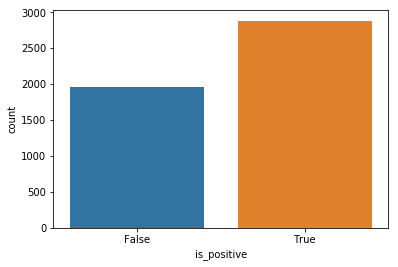

In [30]:
sns.countplot(x = 'is_positive', data = tweet_data)

Contrary to intuition, it turns out Trump sends out more positive than negative tweets. Although that's still quite a bit a negativity, probably significantly more than the average twitter account!

Next we'll want some basic stat's on Trump average number of retweets and his average sentiment level

In [31]:
tweet_data['favorites'].mean()

85605.781262897231

In [32]:
tweet_data['sentiment'].mean()

0.1711043860975964

A score of .17 is consistent with our above bargraph and tells us that Trump's tweets are generally positive.

## Hypothesis test

After some exploration it's time to examine our hypothesis to see if sentiment affects the ammount of favorites one of Trump's tweets recieve. Our alternate hypothesis is "There is a negative relationship between the positivity of a tweet and the ammount of favorites it recieves" and our null hypothesis is conversely "There is no relationship between the sentiment of a tweet and it's favorite count".

So let's get plotting!

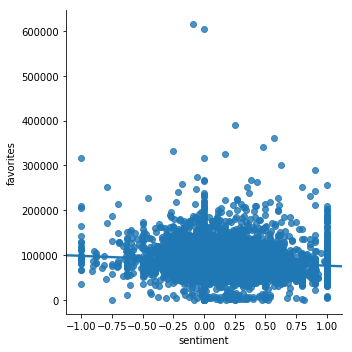

In [33]:
sns.lmplot(y = 'favorites', x = 'sentiment', data = tweet_data)

If there's a relationship it's a very small one.

But even still for educations sake we are going to go ahead and explore the data even more, if only just to demonstrate some interesting tools.

So seasborn allows us to fit a regression line easily, but what if we want get more details from that line? Maybe the exact y-intercept? Or slope? Or a formal metric of strength of relationship? We can use sklearn to find an exact regression object with methods to answer all those questions. We will even be able to predict outputs based on inputs.

To do this, we create an empty regression model, then feed-- or fit-- it with example data. In this case we will fit it with a single x feature for every y result. In this case we need to reshape our x values.

In [34]:
from sklearn import linear_model
import numpy as np
lin_reg = linear_model.LinearRegression()

x = np.array(tweet_data['sentiment']).reshape(-1, 1)

lin_reg.fit(x, tweet_data['favorites'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now we have a regression model that can be used to predict the number of favorites a tweet gets based on its sentiment.

A fully positive tweet?

In [35]:
lin_reg.predict([[1]])

array([ 76527.01701269])

And what about a totally negative tweet?

In [36]:
lin_reg.predict([[-1]])

array([ 98432.70476864])

We can get a quanitive metric of the strength of the relationship in the form of it's R^2 value. A value of 1 implies a very strong relationship, where 0 implies a weak relationship.

We get the R^2 with the `score()` command

In [37]:
lin_reg.score(x, tweet_data['favorites'])

0.0096786279598264358

Clearly there is not a strong relationship, at least not enough to confidently reject our null hypothesis.

# Final hypothesis
We'll examine one final relationship. Trump has been known use a collection of buzzwords in his tweets. Words and phrases like "Fake news!", "Lyin' Hilary Clinton!", "Obstructionist democrats", and-- his favorite boogeyman of all-- "Obama".

We will examine if these words elicit a stronger response than the average tweet. Formally, our null hypothesis reads "The selected keywords do not affect the ammount of favorites a tweet recieves" and the alternative hypothesis "The precense of our selected keywords will cause a tweet to gain a higher than average number of favorites".

To do this we wil collect the frequencies of certain words into an m x n array, where m is the total number of tweets and n is the number of keywords we examine. Then we will feed the features into a [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

A [random forest classifier](https://en.wikipedia.org/wiki/Random_forest) will take in a set of X values and find the closest set of examples and extrapolate a prediction based on their coresponding Y value.

In this case our X values are the frequency of our keywords, and the Y values are a boolean of whether or not the tweet recieved a greater than average number of favorites.

In [47]:
def make_features(series):
    collusion = series['text'].lower().count("collusion")
    fake_news = series['text'].lower().count("fake news")
    obama = series['text'].lower().count("obama")
    obstruction = series['text'].lower().count("obstruction")
    mueller = series['text'].lower().count("mueller")
    clinton = series['text'].lower().count('clinton')
    return pd.Series([collusion, fake_news, obama, obstruction, mueller, clinton])

features = tweet_data.apply(make_features, axis = 1)
y = tweet_data['favorites'] > tweet_data['favorites'].mean()

from sklearn import linear_model
from sklearn import ensemble

clf = ensemble.RandomForestClassifier()
clf.fit(features, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Now we have a working classifer that we can used to predict based on example word frequencies!

But just as before we want to get some level of confidence about our classifer, wether it really works or not. To start off, let's get a metric to see how much influence each keyword has on the prediction value. We do this with the `feature_importances_` attribute. It will return an array corresponding to the weight of each keyword.

In [39]:
clf.feature_importances_

array([ 0.08778898,  0.47012128,  0.09425181,  0.07301266,  0.08363477,
        0.19119049])

It's quite interesting to see that "fake news" plays the biggest role! It seems fairly intuitive because that is a Trump classic.

Next let's get a prediction score similar to how we did for the earlier linear regression. But before we do it's important to note the limitation of our classifier. It does not have much use for extrapolation on tweets not containing those keywords, but rather only extrapolations about tweets with those keywords. Therefore, our score will be significantly lower than its true effectiveness, because we are including data without the keywords. But if the score is any higher than 50% it reflects very highly on our classifer, because it means the applicable tweets are increasaing the guess percentage significantly.

In [40]:
clf.score(features, y)

0.60998761865456042

And as expected the score is quite a bit higher than 50%!

Let's code up a simple function to make it easy to predict

In [41]:
def prediction_by_keyword(collusion = 0, fake_news = 0, obama = 0,
                          obstruction = 0, mueller = 0, clinton = 0):
    return clf.predict([[collusion, fake_news, obama, obstruction, 
                         mueller, clinton]])

And let's test out our function to see if we can reject out null hypothesis that specific keywords do not influence if a tweet will recieve above or below average favorites.

In [48]:
print(prediction_by_keyword(fake_news = 2, clinton = 1))
print(prediction_by_keyword(obstruction = 1, mueller = 1))
print(prediction_by_keyword(1, 1, 1, 1, 1, 1))
print(prediction_by_keyword(collusion = 1))
print(prediction_by_keyword(collusion = 2))
print(prediction_by_keyword(collusion = 1, fake_news = 1))
print(prediction_by_keyword(fake_news = 1))
print(prediction_by_keyword(fake_news = 2, mueller = 1))
print(prediction_by_keyword(clinton = 2))

[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]
[ True]


As expected tweets containing these keywords had higher a than average number of favorites! So we will reject out null hypothesis!

And this gives us important insight into the president's usage of twitter. By producing tweets that produce a positive reaction from his supporters he is enciting their enthuasism in the same way a rally does. It is always advantageous to a politician to have an enthuesiastic base.

This information may influence the way Trump uses his twitter-- even if just implicitly. He knows that certain tweets get a certain reaction, specifically a reaction he likes, so he will make those tweets more often, even if just subconciously.

# Conclusion

Throughout this piece we tested four seperate hypothesis relating to Trump's tweeting behavior and his bases reactions to that behavior.

Through hypothesis testing we discovered that Trump's approval rating does not have an impact on the frequency of his tweeting. Just because things are going bad for his administration does not mean he will spend the day tweeting. Similarly, we concluded that a negative approval rating does not influence his likelihood to stay up late in the night tweeting.

These hypothesis provide valueable information for determining the legitimacy of Trump's twitter as an offical tool, rather than a glorified diary.

Our final two hypothesis focused on the content of Trump's tweets and how that affected his bases perception and excitement of the message. Most interesting of all we found that scapegoat keywords caused a higher level of excitement in his followers.

Trump's twitter usage is a fascinating development in the field of political communication. Just as FDR's fireside talks and Nixon's television debate sweat are the topic of much discussion, Trump's twitter too will be the subject of much study.